In [15]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
# Get the data
# Read the 'KKN_Project_Data' csv file into a dataframe (df)

df = pd.read_csv('KNN_Project_Data')

In [10]:
# Check the head of the dataframe

df.head()

XVPM         GWYH         TRAT        TLLZ         IGGA  \
0  1636.670614   817.988525  2565.995189  358.347163   550.417491   
1  1013.402760   577.587332  2644.141273  280.428203  1161.873391   
2  1300.035501   820.518697  2025.854469  525.562292   922.206261   
3  1059.347542  1066.866418   612.000041  480.827789   419.467495   
4  1018.340526  1313.679056   950.622661  724.742174   843.065903   

          HYKR         EDFS        GUUB         MGJM         JHZC  \
0  1618.870897  2147.641254  330.727893  1494.878631   845.136088   
1  2084.107872   853.404981  447.157619  1193.032521   861.081809   
2  2552.355407   818.676686  845.491492  1968.367513  1647.186291   
3   685.666983   852.867810  341.664784  1154.391368  1450.935357   
4  1370.554164   905.469453  658.118202   539.459350  1899.850792   

   TARGET CLASS  
0             0  
1             1  
2             1  
3             0  
4             0

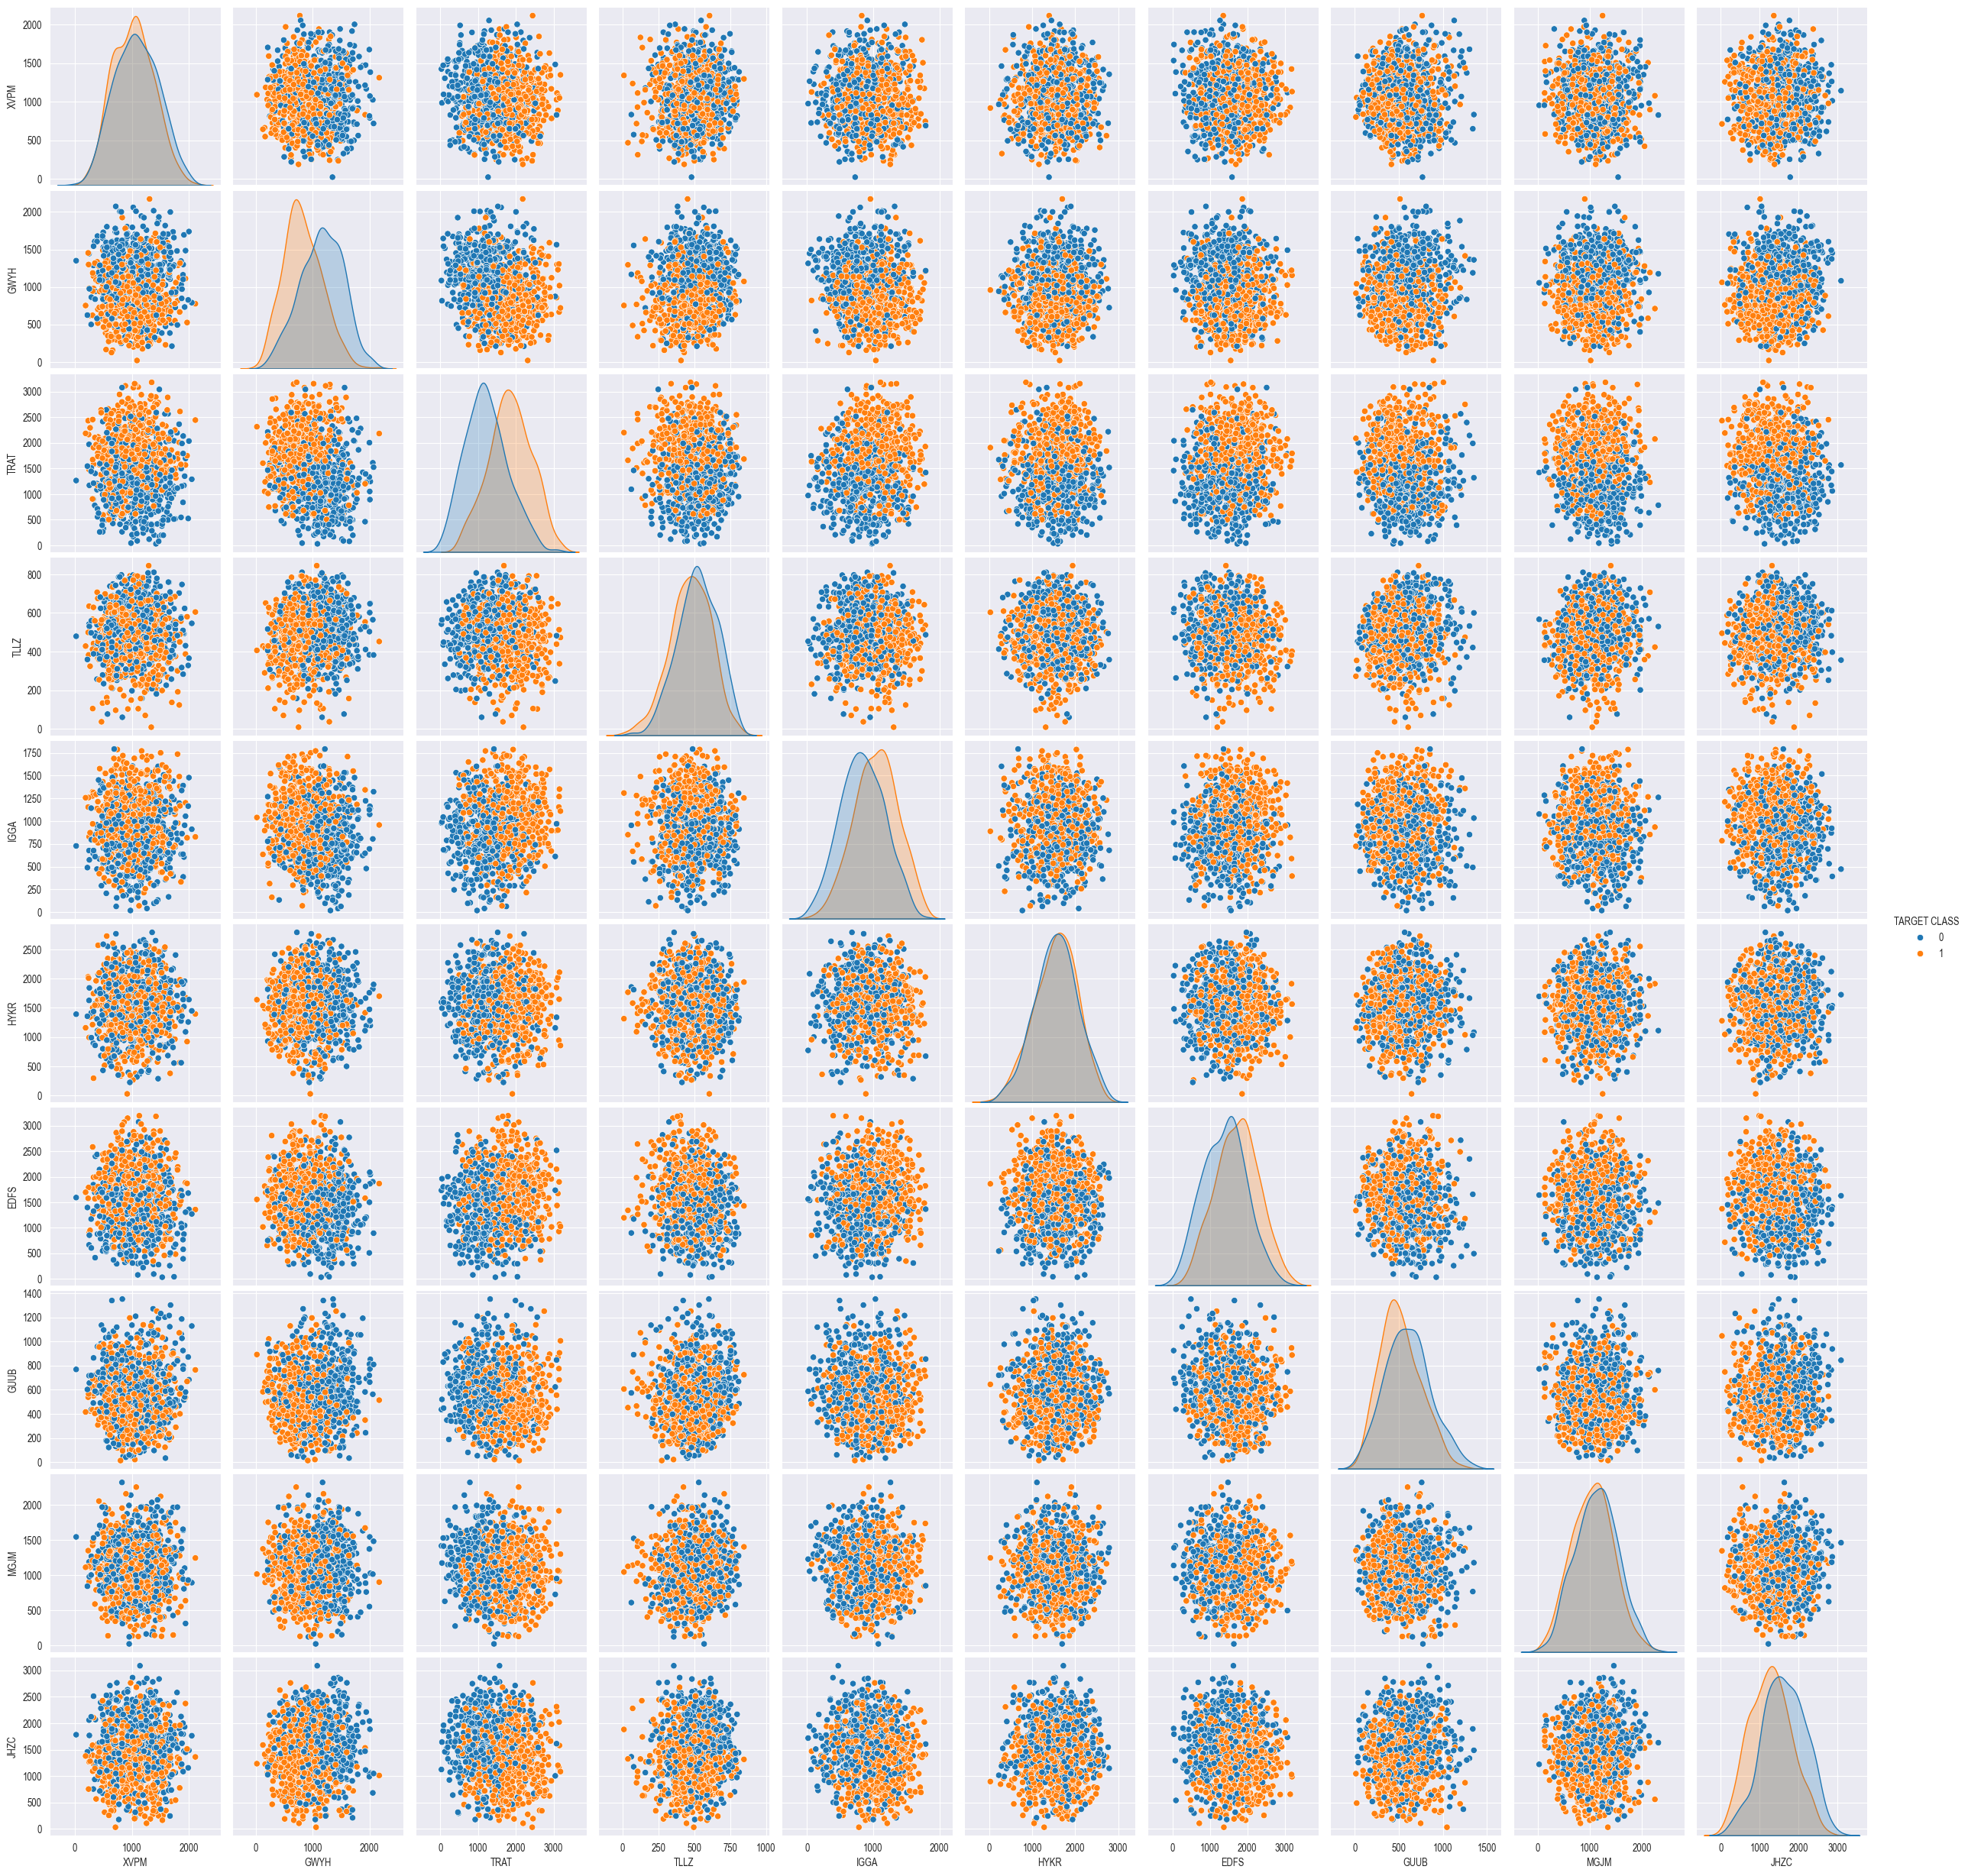

In [17]:
# Use seaborn on the dataframe to create a pairplot with the hue indicated by the TARGET CLASS column.


sns.pairplot(data=df, hue='TARGET CLASS')

In [ ]:
# Standardize the Variables
# Import StandardScaler from sklearn learn

from sklearn.preprocessing import StandardScaler

In [ ]:
# Create a StandScaler()object called scaler

scaler = StandardScaler()

In [ ]:
# Fit scaler to the features

scaler.fit(df.drop('TARGET CLASS', axis=1))

In [ ]:
# Use the .transform() method to transform the features to a scaled version

scaled_features = scaler.transform(df.drop('TARGET CLASS', axis=1))

In [18]:
# Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])

In [19]:
df_feat.head()

XVPM      GWYH      TRAT      TLLZ      IGGA      HYKR      EDFS  \
0  1.568522 -0.443435  1.619808 -0.958255 -1.128481  0.138336  0.980493   
1 -0.112376 -1.056574  1.741918 -1.504220  0.640009  1.081552 -1.182663   
2  0.660647 -0.436981  0.775793  0.213394 -0.053171  2.030872 -1.240707   
3  0.011533  0.191324 -1.433473 -0.100053 -1.507223 -1.753632 -1.183561   
4 -0.099059  0.820815 -0.904346  1.609015 -0.282065 -0.365099 -1.095644   

       GUUB      MGJM      JHZC  
0 -0.932794  1.008313 -1.069627  
1 -0.461864  0.258321 -1.041546  
2  1.149298  2.184784  0.342811  
3 -0.888557  0.162310 -0.002793  
4  0.391419 -1.365603  0.787762

In [20]:
# Train Test Split
# Use train_test_split to split the data into a training set and a testing set

from sklearn.model_selection import train_test_split

X = df_feat
y = df['TARGET CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [21]:
# Using KNN (K-Nearest-Neighbor)
# import KneighborsClassifier from sklearn learn

from sklearn.neighbors import KNeighborsClassifier

In [22]:
# Create a KNN model instance with n_neighbors = 1

knn = KNeighborsClassifier(n_neighbors=1)

In [23]:
# Fit this KNN model to the training data

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [24]:
# Predictions and Evaluations
# Use the predict method to predict values using your KNN model and X_test

predictions = knn.predict(X_test)

In [25]:
# Create a confusion matrix and classification report

from sklearn.metrics import confusion_matrix, classification_report

In [27]:
# Confusion Matrix first

confusion_matrix(y_test, predictions)

array([[109,  43],
       [ 41, 107]], dtype=int64)

In [28]:
# classification report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.73      0.72      0.72       152
           1       0.71      0.72      0.72       148

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300


In [29]:
# Choosing a k-value
# Create for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list.

# create empty list
error_rate = []

for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    predictions_i = knn.predict(X_test)
    error_rate.append(np.mean(predictions_i != y_test))

Text(0, 0.5, 'Error Rate')

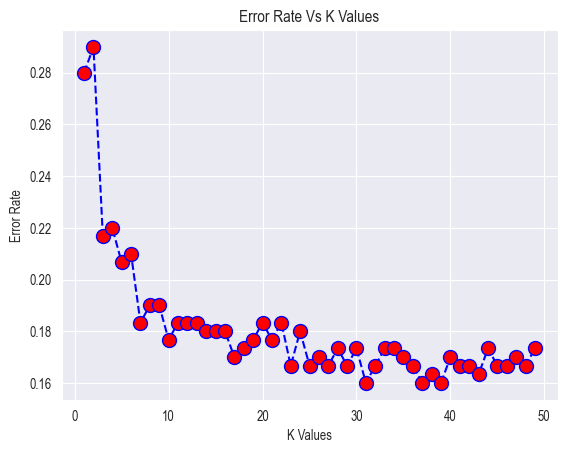

In [31]:
# Plot our error with the range of k-values to determine which k value is the most efficient for our training model

plt.plot(range(1, 50), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate Vs K Values')
plt.xlabel('K Values')
plt.ylabel('Error Rate')

# k = 31 best

In [34]:
# train again our model with new K value(31)
from sklearn.metrics import confusion_matrix, classification_report

knn = KNeighborsClassifier(n_neighbors=31)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
# first the confusion matrix
confusion_matrix(y_test, predictions)

array([[125,  27],
       [ 21, 127]], dtype=int64)

In [36]:
# Classification Report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       152
           1       0.82      0.86      0.84       148

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300
